<a href="https://colab.research.google.com/github/agustinelson/Data_Analysis/blob/main/Homework2/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 2**

- Buscar dataset con datos de los diferentes estados de México.

En caso que sea necesario:

- Quitar NaNs
- Cambiar tipo de dato
- Reestructurar
- Graficar con Seaborn (pairplot, violinplot, heatmap), utilizando en al menos una gráfica 'hue'.

- Hacer mapa coroplético.

In [1]:
!pip install -q kaggle

In [10]:
from google.colab import files
files.upload()
print("Add kaggle file")

Add kaggle file


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d andresjramos/covid19-mexico-clean-order-by-states

  0% 0.00/401k [00:00<?, ?B/s]
100% 401k/401k [00:00<00:00, 101MB/s]


In [7]:
!ls

covid19-mexico-clean-order-by-states.zip  kaggle.json  sample_data


In [8]:
! mkdir data

In [9]:
! unzip covid19-mexico-clean-order-by-states.zip -d data

Archive:  covid19-mexico-clean-order-by-states.zip
  inflating: data/Covid_19_Mexico_Clean_Complete.csv  


In [15]:
import pandas as pd
import seaborn as sb

In [16]:
df = pd.read_csv("data/Covid_19_Mexico_Clean_Complete.csv")
df = df.dropna()

In [17]:
df

,State,Municipality,Date,Deaths,Confirmed,Recovered,Active
0,AGUASCALIENTES,AGUASCALIENTES,2020-03-07,0,1,1,0
1,AGUASCALIENTES,AGUASCALIENTES,2020-03-10,0,1,1,0
2,AGUASCALIENTES,AGUASCALIENTES,2020-03-12,0,1,1,0
3,AGUASCALIENTES,AGUASCALIENTES,2020-03-14,0,1,1,0
4,AGUASCALIENTES,AGUASCALIENTES,2020-03-16,0,2,2,0
...,...,...,...,...,...,...,...
92315,ZACATECAS,ZACATECAS,2020-09-10,0,10,0,10
92316,ZACATECAS,ZACATECAS,2020-09-11,1,16,0,15
92317,ZACATECAS,ZACATECAS,2020-09-12,0,7,0,7
92318,ZACATECAS,ZACATECAS,2020-09-13,0,10,0,10


## Pairplot

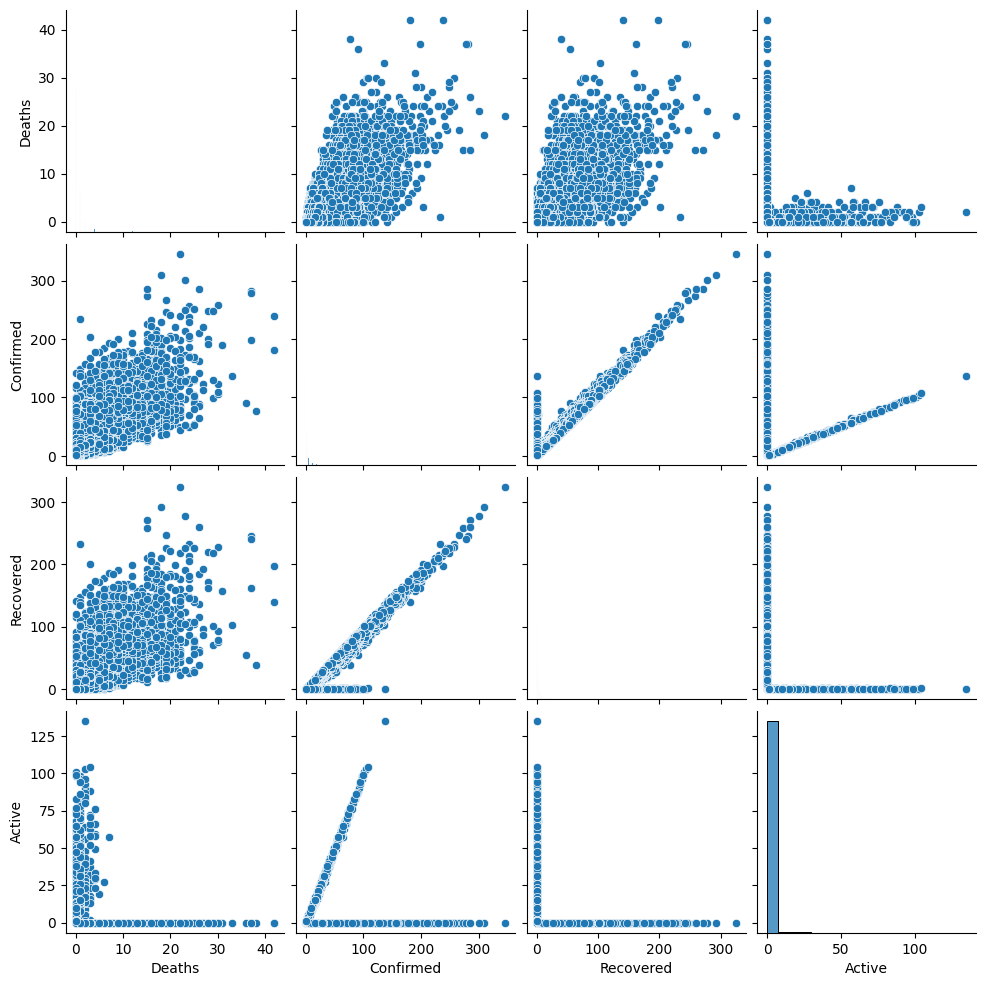

In [ ]:
sb.pairplot(df)

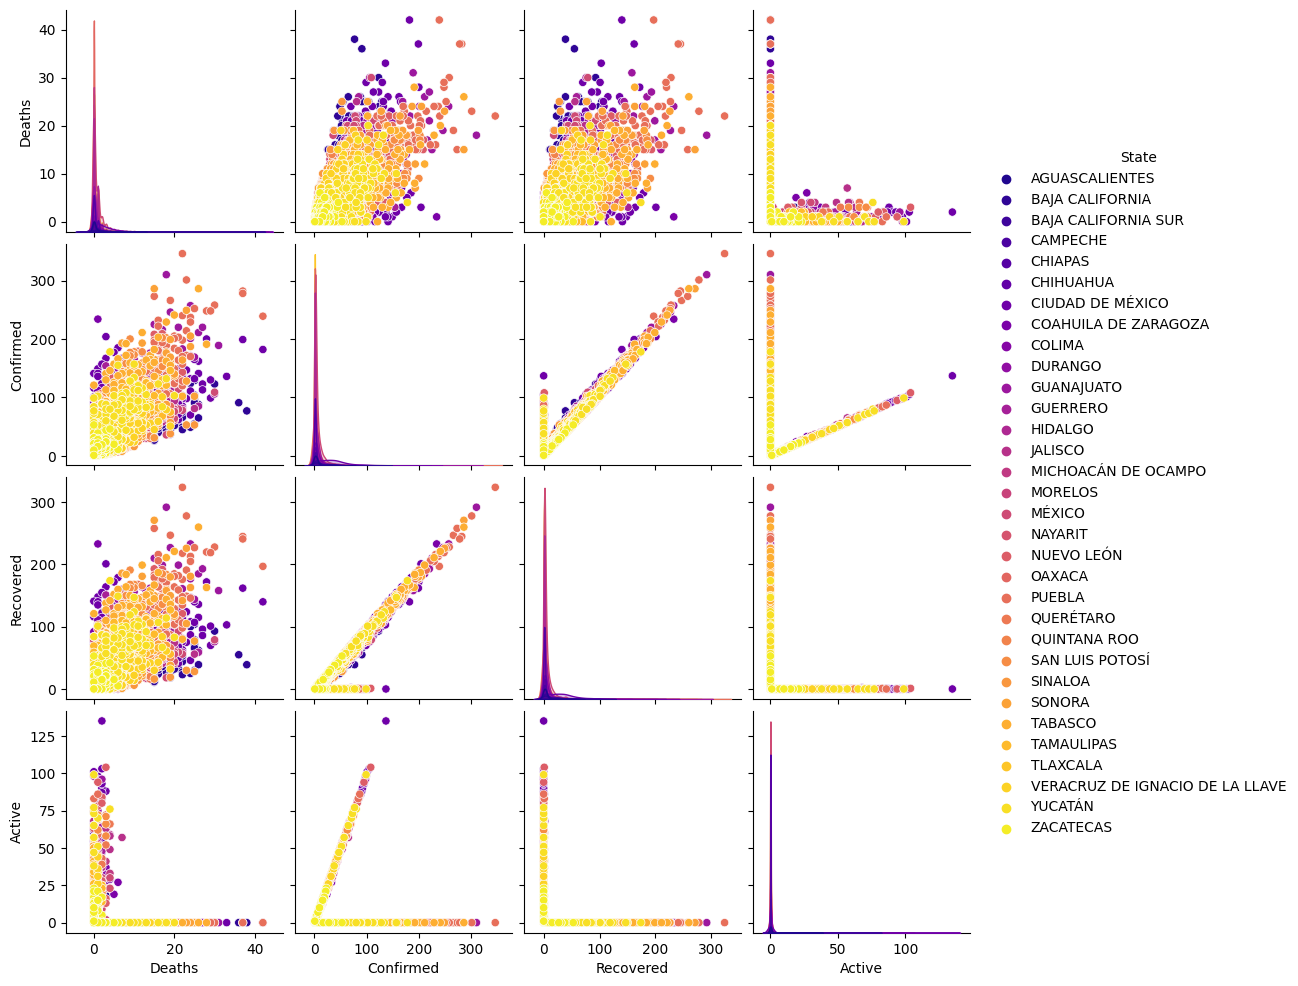

In [ ]:
sb.pairplot(df, hue="State", palette = "plasma")

<Axes: xlabel='Confirmed', ylabel='State'>

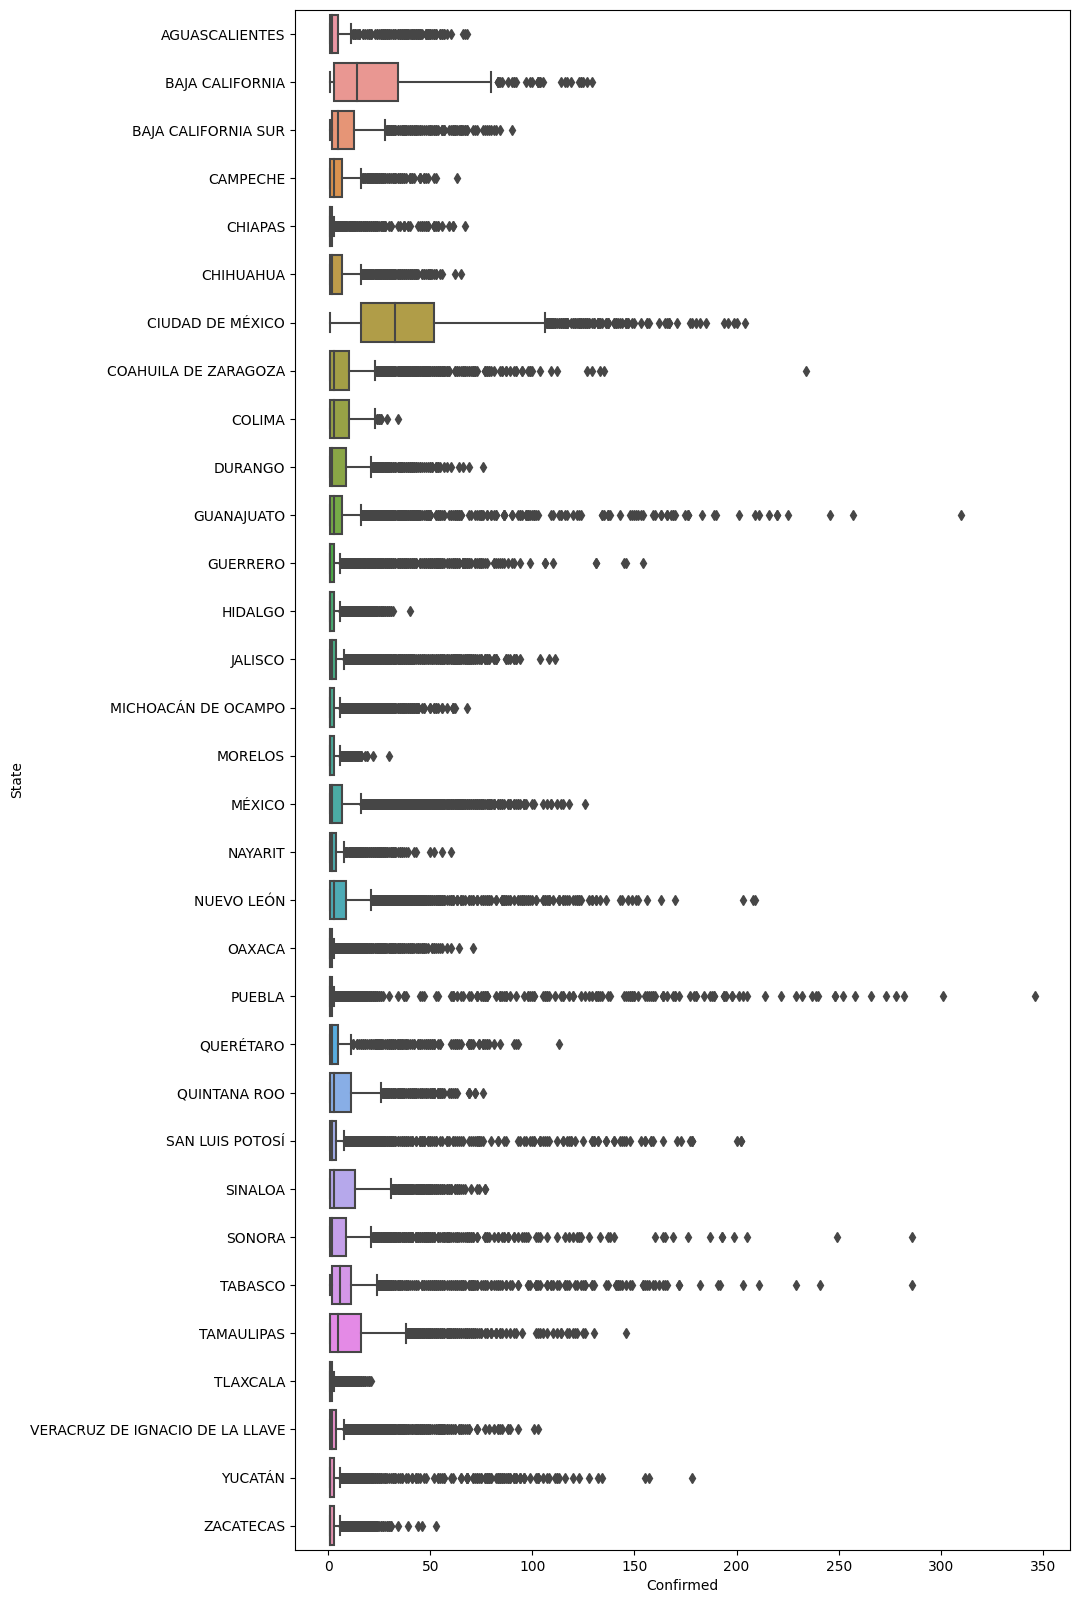

In [18]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10,20))
sb.boxplot(data = df, y = "State", x = "Confirmed", orient='h')

<Axes: xlabel='Recovered', ylabel='State'>

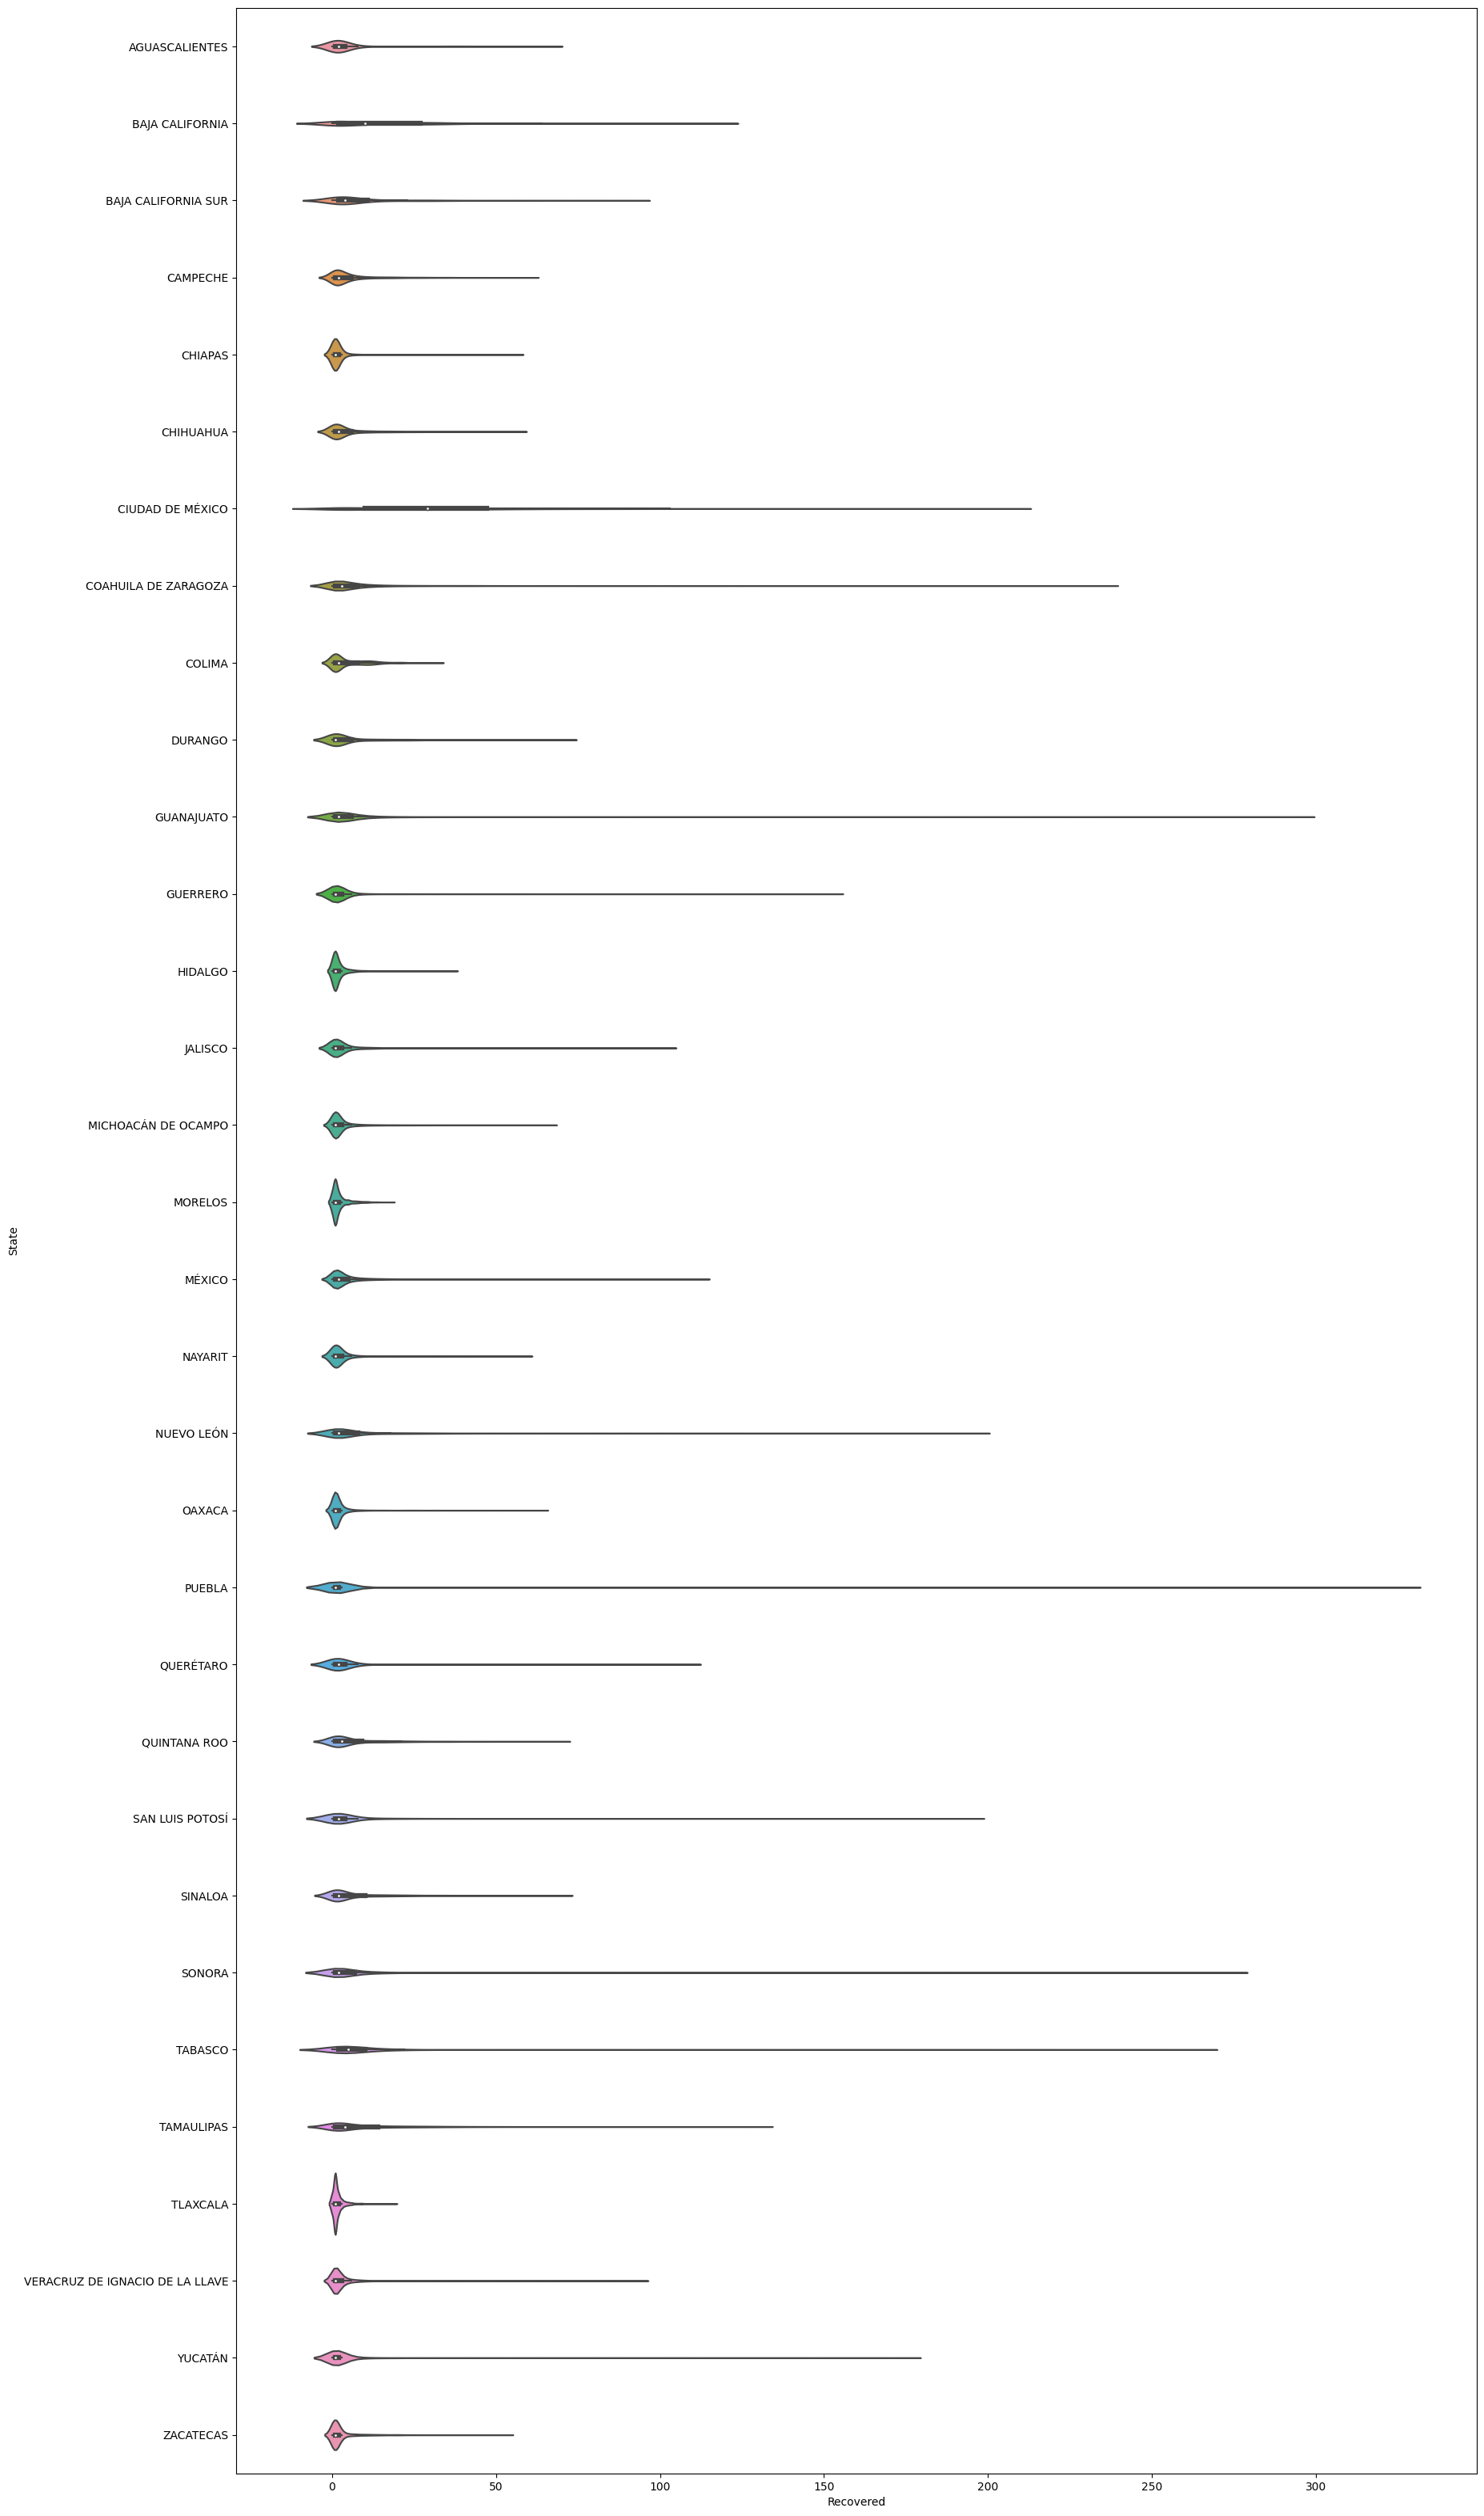

In [24]:
fig, ax = pyplot.subplots(figsize=(20,40))
sb.violinplot(data = df, y = "State", x = "Recovered", orient='h')

<ipython-input-26-2a7f549c8774>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)


<Axes: >

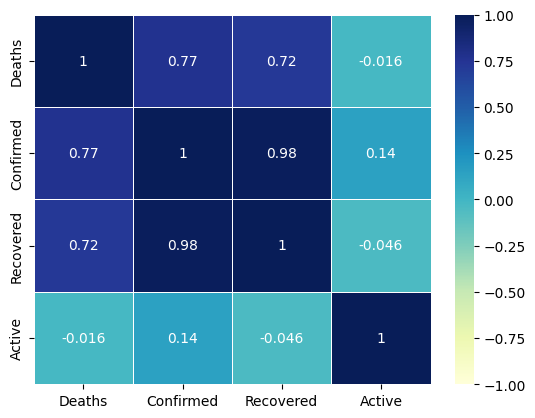

In [26]:
sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

In [41]:
data = df.groupby(["State"]).sum()

<ipython-input-41-27674ed8f8e5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby(["State"]).sum()


In [57]:
data.index.str.capitalize()

Index(['Aguascalientes', 'Baja california', 'Baja california sur', 'Campeche',
       'Chiapas', 'Chihuahua', 'Ciudad de méxico', 'Coahuila de zaragoza',
       'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
       'Michoacán de ocampo', 'Morelos', 'México', 'Nayarit', 'Nuevo león',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana roo', 'San luis potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de ignacio de la llave', 'Yucatán', 'Zacatecas'],
      dtype='object', name='State')

In [58]:
data["State"] = data.index.str.capitalize()

In [59]:
data

,Deaths,Confirmed,Recovered,Active,State
State,,,,,
AGUASCALIENTES,515,6512,5718,279,Aguascalientes
BAJA CALIFORNIA,3381,18427,14709,337,Baja california
BAJA CALIFORNIA SUR,425,9226,7936,865,Baja california sur
CAMPECHE,785,5836,4978,73,Campeche
CHIAPAS,1081,6418,5261,76,Chiapas
CHIHUAHUA,1264,9269,7874,131,Chihuahua
CIUDAD DE MÉXICO,9121,114736,100080,5535,Ciudad de méxico
COAHUILA DE ZARAGOZA,1678,24597,21777,1142,Coahuila de zaragoza
COLIMA,472,4337,3570,295,Colima


In [27]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json

SyntaxError: ignored

In [29]:
import folium

In [30]:
?folium.Choropleth

In [62]:
m = folium.Map(location=[22, -50], zoom_start=2, width='100%', height='100%',position='bottomLeft')

folium.Choropleth(
    geo_data="https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json",
    name='choropleth',
    data=data,
    columns=['State', 'Confirmed'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', #'BuPu',
    fill_opacity=0.9,
    line_opacity=0.2,
    nan_fill_color = 'white',
    line_color="purple", 
    line_weight=1,
    legend_name='Emisiones Totales',
).add_to(m)

folium.LayerControl().add_to(m)

m